In [1]:
import pandas as pd
import geopandas as gpd

In [5]:
fin = gpd.read_file(r'C:\Users\comp\Documents\new_york_taxis\nyclion_19d\lion\lion.gdb', layer='lion')

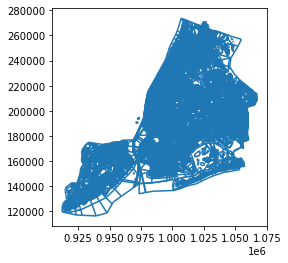

In [6]:
fin.plot()

In [15]:
fin.head().to_crs('EPSG:4326')

RuntimeError: b'no arguments in initialization list'

In [2]:
taxis = pd.read_csv('yellow_tripdata_2015-05.csv', chunksize = 100000)

In [3]:
#taxis.shape

In [4]:
#taxis.get_chunk(100)

In [5]:
import shapely
from shapely.geometry import asShape, asPoint

from geoalchemy2 import Geometry, WKTElement
import  sqlalchemy 

pg = open('db_credentials.txt')
db = pg.read()
pg.close()
engine = sqlalchemy.create_engine(db)

def parse_point(x):
    return WKTElement(asPoint([x['pickup_longitude'], x['pickup_latitude']]), srid=4326)

#chunk = taxis.get_chunk(100000)

# parse lat/long to WKTElement
for i,chunk in enumerate(taxis):
    print(i)
    #chunk['pickup_point'] = chunk.apply(lambda x : WKTElement(asPoint([x['pickup_longitude'], x['pickup_latitude']]), srid=4326), axis = 1)
    #chunk['dropoff_point'] = chunk.apply(lambda x : WKTElement(asPoint([x['dropoff_longitude'], x['dropoff_latitude']]), srid=4326), axis = 1)
    
    
#     chunk.to_sql('taxis_2015', engine, if_exists='append',
#                  index=False, dtype={'pickup_point': Geometry('POINT', srid= 4326),
#                                      'dropoff_point': Geometry('POINT', srid= 4326)})
    chunk.to_sql('taxis_2015', engine, if_exists='append', index=False, method = 'multi')
    
    if i == 10:
        break
    #chunk = taxis.get_chunk(100000)
    


0
1
2
3
4
5
6
7
8
9
10
